# Explore Guide Efficiency Effect

The goal of this notebook is to explore whether or not guide efficiency has a substantial effect on gene expression, using the 664 published enhancer-gene pairs from the Gasperini et al. dataset. 

Author: Karthik Guruvayurappan

In [60]:
library(rhdf5)
library(stats)
library(BoutrosLab.plotting.general)
library(MASS)

In [61]:
# read in previously published enhancer-gene pairs for validation
enhancer.gene.pairs <- read.csv('/iblm/netapp/data1/external/Gasperini2019/gasperini_enhancer_gene_pairs_suppl_table_2.csv')
head(enhancer.gene.pairs)

,Target_Site,ENSG,target_gene_short,Diff_expression_test_raw_pval,Diff_expression_test_fold_change,Diff_expression_test_Empirical_pval,Diff_expression_test_Empirical_adjusted_pval,high_confidence_subset,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<int>
1,chr2.2482,ENSG00000115977,AAK1,1.451572e-03,0.7565418,0.002719115,0.09865186,TRUE,chr2,69056234,69056865
2,chrX.2695,ENSG00000101986,ABCD1,7.351840e-04,0.6693686,0.001824566,0.07301369,TRUE,chrX,153250743,153251468
3,chr10.2252,ENSG00000138316,ADAMTS14,2.140000e-09,0.4473551,0.000449245,0.03249770,FALSE,chr10,72426863,72427518
4,chr1.8461,ENSG00000143382,ADAMTSL4,1.157260e-04,0.6676576,0.001044298,0.05041364,TRUE,chr1,150517877,150518596
5,chr11.1006,ENSG00000148926,ADM,5.881130e-04,0.3091749,0.001651173,0.06733578,TRUE,chr11,9573345,9573973
6,chr2.7130,ENSG00000157985,AGAP1,2.390000e-07,0.5843086,0.000583231,0.03626832,TRUE,chr2,236369078,236369902


In [62]:
enhancer.gene.pairs <- enhancer.gene.pairs[order(enhancer.gene.pairs$Diff_expression_test_raw_pval), ]
head(enhancer.gene.pairs, 30)

,Target_Site,ENSG,target_gene_short,Diff_expression_test_raw_pval,Diff_expression_test_fold_change,Diff_expression_test_Empirical_pval,Diff_expression_test_Empirical_adjusted_pval,high_confidence_subset,chr.candidate_enhancer,start.candidate_enhancer,stop.candidate_enhancer
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<int>
409,chr4.1627,ENSG00000109255,NMU,0.00e+00,0.1883389,3.94e-06,0.000407239,TRUE,chr4,56596632,56597095
340,chr11.1735,ENSG00000135363,LMO2,1.11e-216,0.2626188,3.94e-06,0.000407239,TRUE,chr11,33966182,33966805
597,chrX.232,ENSG00000205542,TMSB4X,1.59e-207,0.4797451,3.94e-06,0.000407239,TRUE,chrX,12973885,12974748
598,chrX.233,ENSG00000205542,TMSB4X,6.02e-148,0.4955325,3.94e-06,0.000407239,TRUE,chrX,12974917,12975383
288,chr20.846,ENSG00000125968,ID1,1.90e-136,0.3651164,3.94e-06,0.000407239,TRUE,chr20,30198326,30198924
471,chr16.1866,ENSG00000166501,PRKCB,2.63e-134,0.4477198,3.94e-06,0.000407239,TRUE,chr16,23833191,23833694
325,chr17.2493,ENSG00000171345,KRT19,8.21e-132,0.3938793,3.94e-06,0.000407239,TRUE,chr17,39686256,39687108
55,chrX.1665,ENSG00000102409,BEX4,1.25e-111,0.3539978,3.94e-06,0.000407239,TRUE,chrX,102488065,102488647
248,chr16.29,ENSG00000130656,HBZ,1.43e-105,0.6776931,3.94e-06,0.000407239,TRUE,chr16,192954,193472


In [63]:
enhancer <- 'chr11.1734'
gene <- 'ENSG00000135363'

In [64]:
# read in table that connects target sites to guide spacer sequences
target.site.spacers.table <- read.table(
    '/iblm/netapp/data1/external/Gasperini2019/suppl/GSE120861_grna_groups.at_scale.txt',
    sep = '\t'
)
colnames(target.site.spacers.table) <- c('target.site', 'spacer.sequence')
target.site.spacers.table$target.site <- sapply(target.site.spacers.table$target.site, FUN = function(x) {
    if (startsWith(x, 'chr')) {
        return (strsplit(x, '_')[[1]][1])
    }
    else {
        return (x)
    }
})
head(target.site.spacers.table)

,target.site,spacer.sequence
,<chr>,<chr>
1,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG
2,MTRNR2L8_TSS,AAATAGTGGGAAGATTCGTG
3,FAM83A_TSS,AACACACCACGGAGGAGTGG
4,ZNF593_TSS,AACAGCCCGGCCGGCCAAGG
5,ATPIF1_TSS,AACGAGAGACTGCTTGCTGG
6,TIPRL_TSS,AACGGCTCGGAAGCCTAGGG


In [65]:
# get spacer sequences of guides coresponding to target site
enhancer.spacers <- target.site.spacers.table[target.site.spacers.table$target.site == enhancer, ]$spacer.sequence
enhancer.spacers

[1] "GCAATTAATAGAATCCAGCG" "GAGCCCTGAGTCCCACAGCA" "AGGGCTCTCTGGCCAGCAAA"
[4] "TGATTAGGGACAGTTCCCCG"

In [66]:
# read in guide efficiency information
all.guide.efficiencies <- h5read('/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5', 'guidescan.output')
all.guide.efficiencies$spacer <- substring(all.guide.efficiencies$gRNA, 1, nchar(all.guide.efficiencies$gRNA) - 3)
head(all.guide.efficiencies)

,Index,gRNA,Chromosome,Start,End,Strand,Num.Off.Targets,Off.Target.Summary,Specificity,Cutting.Efficiency,spacer
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,0,CTAAAGCATTGGCTGAGAAGNGG,chr8,23911081,23911103,-,41,2:2 | 3:39,0.13622800,0.565010,CTAAAGCATTGGCTGAGAAG
2,1,GTAGTTCACATAATCCCTGTNGG,chr4,25698193,25698215,-,55,2:0 | 3:55,0.16592900,0.572492,GTAGTTCACATAATCCCTGT
3,2,AAGTTGACTCTACATAGCAGNGG,chr8,23912565,23912587,+,22,2:1 | 3:21,0.34106700,0.636691,AAGTTGACTCTACATAGCAG
4,3,AATATTCTCCCTCATTCTGGNGG,chr5,12539360,12539382,-,803,2:26 | 3:777,0.00274364,0.619800,AATATTCTCCCTCATTCTGG
5,4,AATCCTCTAATGGACGAAGANGG,chr8,23913057,23913079,-,24,2:0 | 3:24,0.33441500,0.602272,AATCCTCTAATGGACGAAGA
6,5,AGATACCTATGGCCATATAGNGG,chr5,12540099,12540121,+,14,2:0 | 3:14,0.35172300,0.531946,AGATACCTATGGCCATATAG


In [67]:
enhancer.spacers.efficiencies <- all.guide.efficiencies[all.guide.efficiencies$spacer %in% enhancer.spacers, c('spacer', 'Cutting.Efficiency')]
enhancer.spacers.efficiencies

,spacer,Cutting.Efficiency
,<chr>,<dbl>
8571,GAGCCCTGAGTCCCACAGCA,0.639021
8572,AGGGCTCTCTGGCCAGCAAA,0.474897
9307,GCAATTAATAGAATCCAGCG,0.775097
9308,TGATTAGGGACAGTTCCCCG,0.771652


In [68]:
# read in cell-guide matrix
cell.guide.matrix <- h5read('/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5', 'cell.guide.matrix')
guide.spacers <- h5read('/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5', 'guide.spacers')
print(head(cell.guide.matrix))
print(head(guide.spacers))

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    1    1    1    1    1    1    1    1    1     1     1     1     1     1
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     1     1     1     1     1     1     1     1     1     1     1     1
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0   

In [69]:
colnames(cell.guide.matrix) <- guide.spacers

In [70]:
enhancer.spacers.efficiencies

,spacer,Cutting.Efficiency
,<chr>,<dbl>
8571,GAGCCCTGAGTCCCACAGCA,0.639021
8572,AGGGCTCTCTGGCCAGCAAA,0.474897
9307,GCAATTAATAGAATCCAGCG,0.775097
9308,TGATTAGGGACAGTTCCCCG,0.771652


In [71]:
guide.1.vector <- cell.guide.matrix[, enhancer.spacers.efficiencies$spacer[1]]
guide.2.vector <- cell.guide.matrix[, enhancer.spacers.efficiencies$spacer[2]]
guide.3.vector <- cell.guide.matrix[, enhancer.spacers.efficiencies$spacer[3]]
guide.4.vector <- cell.guide.matrix[, enhancer.spacers.efficiencies$spacer[4]]
guide.all.vector <- guide.1.vector * guide.2.vector * guide.3.vector * guide.4.vector
guide.123.vector <- guide.1.vector * guide.2.vector * guide.3.vector - guide.all.vector
guide.124.vector <- guide.1.vector * guide.2.vector * guide.4.vector - guide.all.vector
guide.134.vector <- guide.1.vector * guide.3.vector * guide.4.vector - guide.all.vector
guide.234.vector <- guide.2.vector * guide.3.vector * guide.4.vector - guide.all.vector
guide.12.vector <- guide.1.vector * guide.2.vector - guide.123.vector - guide.124.vector - guide.all.vector
guide.13.vector <- guide.1.vector * guide.3.vector - guide.123.vector - guide.134.vector - guide.all.vector
guide.14.vector <- guide.1.vector * guide.4.vector - guide.124.vector - guide.134.vector - guide.all.vector
guide.23.vector <- guide.2.vector * guide.3.vector - guide.123.vector - guide.234.vector - guide.all.vector
guide.24.vector <- guide.2.vector * guide.4.vector - guide.124.vector - guide.234.vector - guide.all.vector
guide.34.vector <- guide.3.vector * guide.4.vector - guide.134.vector - guide.234.vector - guide.all.vector 
guide.1.vector <- guide.1.vector - guide.12.vector - guide.13.vector - guide.14.vector - guide.123.vector - guide.124.vector - guide.134.vector - guide.all.vector
guide.2.vector <- guide.2.vector - guide.12.vector - guide.23.vector - guide.24.vector - guide.123.vector - guide.124.vector - guide.234.vector - guide.all.vector
guide.3.vector <- guide.3.vector - guide.13.vector - guide.23.vector - guide.34.vector - guide.123.vector - guide.134.vector - guide.234.vector - guide.all.vector
guide.4.vector <- guide.4.vector - guide.14.vector - guide.24.vector - guide.34.vector - guide.124.vector - guide.134.vector - guide.234.vector - guide.all.vector
guide.none.vector <- rep(1, nrow(cell.guide.matrix)) - guide.1.vector - guide.2.vector - guide.3.vector - guide.4.vector - guide.12.vector - guide.13.vector - guide.14.vector - guide.23.vector - guide.24.vector - guide.34.vector - guide.123.vector - guide.124.vector - guide.134.vector - guide.234.vector - guide.all.vector

In [72]:
# read in counts matrix
gene.counts <- h5read('/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5', 'gene.counts')
gene.names <- h5read('/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5', 'gene.names')
rownames(gene.counts) <- gene.names
head(gene.counts)

ENSG00000238009,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237683,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
ENSG00000228463,1,0,1,1,1,0,0,0,0,1,⋯,0,0,0,0,1,0,0,2,0,2
ENSG00000237094,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000235373,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000228327,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [73]:
target.gene.counts <- gene.counts[gene, ]

In [74]:
scaling.factors <- colSums(gene.counts) / 1e6

In [75]:
target.gene.counts <- target.gene.counts * scaling.factors

In [76]:
guide.1.counts <- target.gene.counts[guide.1.vector > 0]
guide.2.counts <- target.gene.counts[guide.2.vector > 0]
guide.3.counts <- target.gene.counts[guide.3.vector > 0]
guide.4.counts <- target.gene.counts[guide.4.vector > 0]
guide.none.counts <- target.gene.counts[guide.none.vector > 0]

In [77]:
guide.1.df <- data.frame(guide.1.counts)
guide.1.df$group <- 'guide.1'
colnames(guide.1.df) <- c('count', 'group')

guide.2.df <- data.frame(guide.2.counts)
guide.2.df$group <- 'guide.2'
colnames(guide.2.df) <- c('count', 'group')

guide.3.df <- data.frame(guide.3.counts)
guide.3.df$group <- 'guide.3'
colnames(guide.3.df) <- c('count', 'group')

guide.4.df <- data.frame(guide.4.counts)
guide.4.df$group <- 'guide.4'
colnames(guide.4.df) <- c('count', 'group')

guide.none.df <- data.frame(guide.none.counts)
guide.none.df$group <- 'none'
colnames(guide.none.df) <- c('count', 'group')

In [78]:
count.df <- rbind(guide.1.df, guide.2.df, guide.3.df, guide.4.df, guide.none.df)

In [79]:
mean(guide.1.counts)
mean(guide.2.counts)
mean(guide.3.counts)
mean(guide.4.counts)
mean(guide.none.counts)

[1] 0.02046396

[1] 0.02180628

[1] 0.02413822

[1] 0.01991805

[1] 0.03670902

In [80]:
min(guide.none.counts)

[1] 0

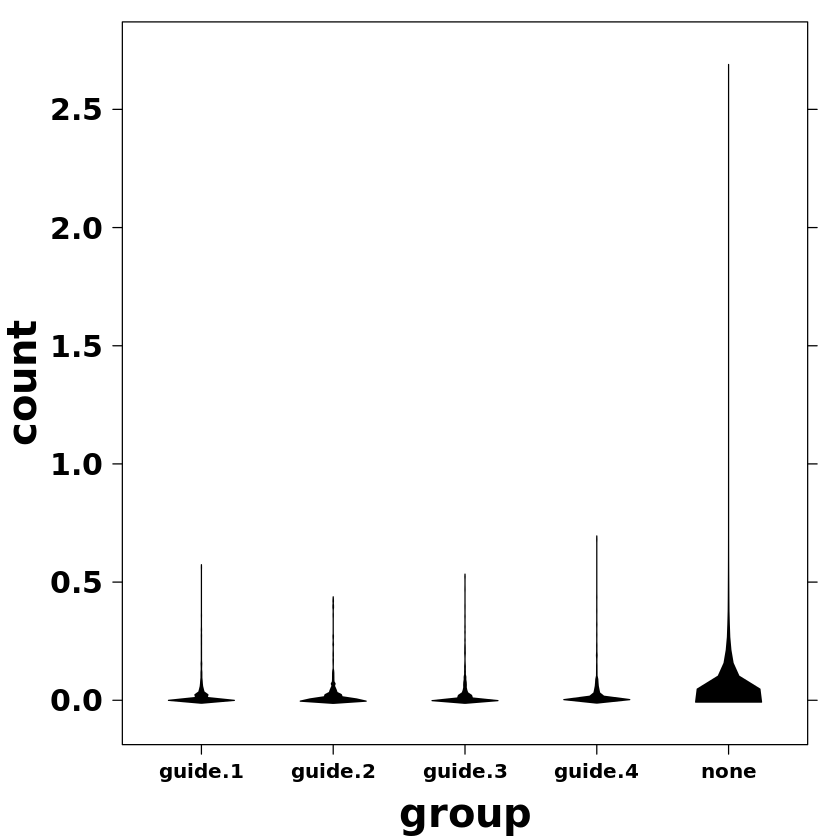

In [81]:
create.violinplot(
    formula = count ~ group,
    data = count.df,
    xaxis.cex = 1,
    # ylimits = c(0, 0.01)
)

In [82]:
indicator.vector.probs <- rep(1, nrow(cell.guide.matrix))

for (j in 1:nrow(enhancer.spacers.efficiencies)) {
        
    guide.spacer <- enhancer.spacers.efficiencies$spacer[j]
    guide.efficiency <- enhancer.spacers.efficiencies$Cutting.Efficiency[j]

    guide.indicator.vector <- cell.guide.matrix[, guide.spacer]

    guide.probs <- 1 - (guide.indicator.vector * guide.efficiency)

    indicator.vector.probs <- indicator.vector.probs * guide.probs
}

indicator.vector.probs <- 1 - indicator.vector.probs
indicator.vector <- indicator.vector.probs

In [83]:
# read in and sort covariates
print('reading in covariates!')
covariates <- h5read(
    file = '/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5',
    name = 'covariates'
)
cell.barcodes <- h5read(
    file = '/iblm/netapp/data1/external/Gasperini2019/processed/gasperini_data.h5',
    name = 'cell.barcodes'
)
covariates <- merge(
    data.frame(cell.barcodes),
    covariates,
    by.x = 'cell.barcodes',
    by.y = 'cell',
    sort = FALSE
)

[1] "reading in covariates!"


In [84]:
target.gene.counts <- gene.counts[gene, ]

In [85]:
model.df <- cbind(covariates, indicator.vector, target.gene.counts)

In [86]:
head(model.df)

,cell.barcodes,guide_count,prep_batch,percent.mito,s.score,g2m.score,indicator.vector,target.gene.counts
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,67,prep_batch_1,0.058786706,0.110732311,-0.1319208,0,1
2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,26,prep_batch_1,0.036086518,-0.010290919,-0.1535426,0,0
3,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,61,prep_batch_1,0.069823051,-0.175860130,-0.3084879,0,0
4,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,39,prep_batch_1,0.026186508,0.003057281,-0.1574859,0,0
5,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,37,prep_batch_1,0.007991318,-0.144480961,-0.2362154,0,5
6,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,57,prep_batch_1,0.022356681,0.026418076,-0.1462899,0,0


In [87]:
model.df$guide_count[is.na(model.df$guide_count)] <- 0

In [88]:
model <- glm.nb(
    formula = target.gene.counts ~ indicator.vector + prep_batch + guide_count + percent.mito + s.score + g2m.score + offset(scaling.factors),
    data = model.df
)

In [93]:
scatter.data <- data.frame(cbind(log(model$fitted.values), target.gene.counts * scaling.factors))
colnames(scatter.data) <- c('mu', 'count')
head(scatter.data)

,mu,count
,<dbl>,<dbl>
1,0.85695681,0.017566
2,-0.01006649,0.000000
3,0.89418801,0.000000
4,-0.12850150,0.000000
5,-0.64858559,0.050620
6,-0.07503469,0.000000


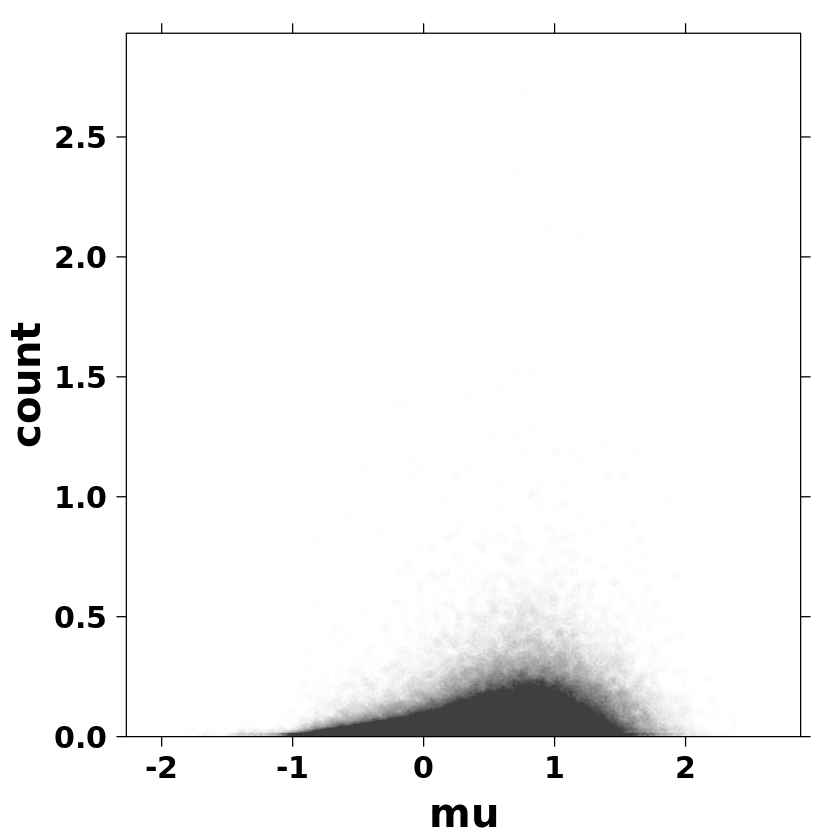

In [94]:
create.scatterplot(
    formula = count ~ mu,
    data = scatter.data,
    alpha = 0.01
)

In [95]:
cor.test(scatter.data$count * scaling.factors, scatter.data$mu)


	Pearson's product-moment correlation

data:  scatter.data$count * scaling.factors and scatter.data$mu
t = 113.34, df = 207322, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2374826 0.2455893
sample estimates:
      cor 
0.2415402 


In [34]:
mu.values <- model$fitted.values

guide.1.mu <- mu.values[guide.1.vector > 0]
guide.2.mu <- mu.values[guide.2.vector > 0]
guide.3.mu <- mu.values[guide.3.vector > 0]
guide.4.mu <- mu.values[guide.4.vector > 0]
guide.none.mu <- mu.values[guide.none.vector > 0]

mu.1.df <- data.frame(guide.1.mu)
mu.1.df$group <- 'guide.1'
colnames(mu.1.df) <- c('mu', 'group')

mu.2.df <- data.frame(guide.2.mu)
mu.2.df$group <- 'guide.2'
colnames(mu.2.df) <- c('mu', 'group')

mu.3.df <- data.frame(guide.3.mu)
mu.3.df$group <- 'guide.3'
colnames(mu.3.df) <- c('mu', 'group')

mu.4.df <- data.frame(guide.4.mu)
mu.4.df$group <- 'guide.4'
colnames(mu.4.df) <- c('mu', 'group')

mu.none.df <- data.frame(guide.none.mu)
mu.none.df$group <- 'none'
colnames(mu.none.df) <- c('mu', 'group')

mu.df <- rbind(mu.1.df, mu.2.df, mu.3.df, mu.4.df, mu.none.df)

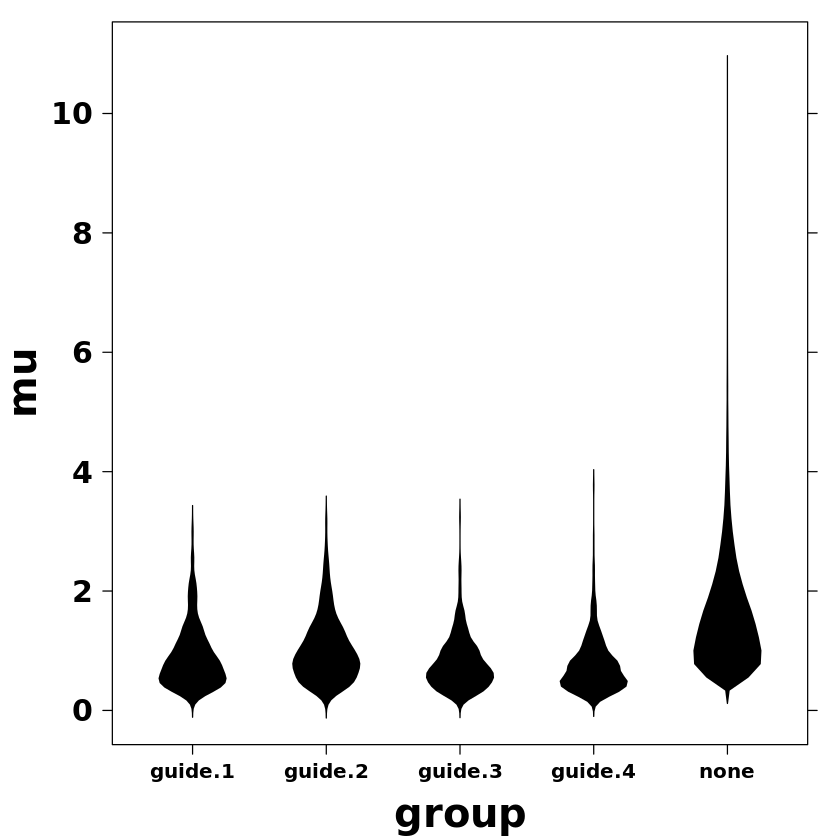

In [35]:
create.violinplot(
    formula = mu ~ group,
    data = mu.df,
    xaxis.cex = 1,
    # ylimits = c(0, 0.01)
)

In [36]:
model <- glm.nb(
    formula = target.gene.counts ~ prep_batch + guide_count + percent.mito + s.score + g2m.score + offset(scaling.factors),
    data = model.df
)

In [37]:
covariate.mu <- model$fitted.values

In [38]:
target.gene.counts

[1]  1  0  0  0  5  0  0  1  0  1  2  4  0  1  6  1  8  1  1  0  0  0  3  0
   [25]  4  3  1  2  3  0  4  1  0  0  1  0  0  4  2  0  1  2  0  1  1  0  0  0
   [49]  7  1  0  1  1  1  0  6  0  8  0 10  3  0  0  0  0  0  0  0  0  0  0  1
   [73]  0  3  0  0  4  3  1  2  1  0  1  3  0  0  1  3  0  3  1  1  1  2  1  0
   [97]  0  0  1  0  1  0  0  3  0  2  1  4  1  1  0  0  0  0  3  0  1  0  0  1
  [121]  0  0  0  6  2  1  0  0  3  0  0  3  1  2  2  1  2  2  1  0  4  0  0  1
  [145]  2  0  0  0  4  4  2  2  1  0  1  0  2  1  1  0  1  0  2  3  6  0  1  2
  [169]  2  0  1  1  2  1  5  3  0  3  4  3  1  2  0  0  1  1  1  2  1  0  2  0
  [193]  2  1  0  0  0  3  2  0  3  0  5  0  2  0  0  0  0  1  0  0  0  1  1  0
  [217]  0  2  0  8  0  1  3  0  0  3  3  2  2  3  0  2  3  5  0  0  1  0  0  9
  [241]  8  4  0  0  0 10  2  0  0  2  2  0  0  1  0  0  7  2  3  0  4  1  0  4
  [265]  2  3  1  1  0  0  0  0  0 10  1  1  2  0  0  0  0  4  1  0  3  2  1  7
  [289]  0  3  0  4  3  0  2  0  0  0  0  2  7  1  8  1  2  1  0  5  1  7  0  0
  [313]  1  1  0  1  0  1  2  0  3  3  0  6  0  0  0  0  2  2  0  3  3  0  2  3
  [337]  5  0  0  0  1  0  0  0  0  2  0  0  2  4  1  0  2  1  0  1  3  1  1  0
  [361]  0  0  2  0  3  0  0  0  4  3  2  0  4  0  0  0  2  4  2  1  2  3  1  1
  [385]  0  0  0  2  6  1  4  0  0  0  1  1  1  0  1  0  1  0  1  5  1  4  5  0
  [409]  3  0  0  1  1  2  0  2  8  3  0  4  2  2  6  3  0  0  0  0  2  0  0  8
  [433]  0  0  0  1  0  4  0  0  1  1  3  1  8  3  2  5  0  0  0  2  1  2  2  4
  [457]  0  0  0  2  1  0  7  2  1  5  2 13  0  0  0  3  2  1  0  0  0  2  1  3
  [481]  0  3  2  1  1  0  1  3  0  2  1  5  3  0  3  1  4  0  4  0  1  1  4  2
  [505]  0  0  0  1  0  6  1  0  0  2  2  0  4  0  3  0  0  1  0  0  3  2  0  4
  [529]  1  4  1  0  0  0  1  3  0  1  0  2  0  0  1  1  1  0  1  4  0  0  0  0
  [553]  0  1 12  4  3  0  1  0  0  0  0  1  2  0  0  3  4  0  2  0  0  2  0  0
  [577]  0  0  2  3  0  4  4  5  0  1  0  0  4  3  0  0  1  1  4  0  3  0  2  1
  [601]  0  3  0  0  1  1  2  0  0  1  2  3  0  6  0  1  0  0  0  0  0  2  0  2
  [625]  0  1  0  0  0  7  0  1  1  0  0  2  3  0  0  9  8  0  0  0  5  1  0  0
  [649]  2  4  0  4  1  0  0  9  0  3  3  1  0  2  1  2  0  3  1  0  6  1  2  0
  [673]  1  0  0  0  4  1  3  0  0  0  3  3  3  0  0  1  1  1  0  1  0  4  4  0
  [697]  6  0  1  4  2  1  1  0  0  1  1  1  2  3  2  0  4  1  0  0  0  0  0  9
  [721]  2  0  0  7  0  0  6  3  1  1  1  0  0  1  0  0  0  1  2  0  1  4  1  0
  [745]  0  1  0  5  0  2  0  3  2  0  0  1  0  1  5  0  0  0  2  5  1  3  0  2
  [769]  3  2  0  0  1  6  1  1  0  3  0  1  0  0  2  0  1  3  0  1  0  6  0  1
  [793]  5  0  0  1  3  0  2  0  0  0  1  5  0  0  0  3  0  5  0  5  2  0  0  0
  [817]  1  2  0  3  0  2  1  1  0  0  0  3  0  0  9  8  0  1  1  5  0  0  1  8
  [841]  0  0  0  5  0  0  0  1  3  2  2  5  1  1  0  0  0  6  5  2  3  0  1  0
  [865]  3  0  4  3  0  0  0  0  1  0  2  1  7  3  3  0  7  1  0  6  2  0  4  0
  [889]  0  1  1  0  1  1  0  0 11  3  3  0 14  0  7  1  0  1  0  1  6 10  1  0
  [913]  0  0  3  4  0  0  0  1  8  0  1  3  0  4  1  0  0  0  0  0  0  5  1  9
  [937]  2  0  0  1  2  0  0  0  2  0  1  0  1  0  6  1  5  9  0  4  2  2  0  1
  [961]  2  0  2  0  0  0  3  0  0  0  9  3  0  1  1  1  1  1  1  0  3  3  7  0
  [985]  0  2  6  4  0  2  4  1  6  0  0  2  4  4  6  0  5  5  1  0  5  2  0  0
 [1009]  2  0  0  1  0  3  1  2  4  0  0  3  1  3  0  2  3  1  0  1  0  0  0  1
 [1033]  1  0  0  0  0  3  2  4  0  0  2  2  0  2  8  0  1  0  1  1  3  0  0  4
 [1057]  0  2  1  0  0  0  0  1  2  0  0  0  4  2  4  2  2  2  1  1  1  0  1  1
 [1081]  0  1  1  2  0  0  0  1  2  1  0  6  0  5  2  0  0  3  0  4  0  3  0  1
 [1105]  0  0  7  0  1  0  3  6  3  4  0  1  0  0  8  1  0  0  4  1  2  0  0  1
 [1129]  0  1  0  0  1  5  0  1  3  0  1  4  5  1  0  2  0  2  2  0  0  2  1  2
 [1153]  6  1  0  0  0  3  0  0  0  4  2  0  0  3  2  0  3  0  0  1  1  1  0  2
 [1177]  0  1  2  4  2  0  1  0  4  1  0  1  1  0  3  1  3  3  0  0  1  0  1  1
 [12

In [39]:
covariate.diffs <- target.gene.counts - covariate.mu

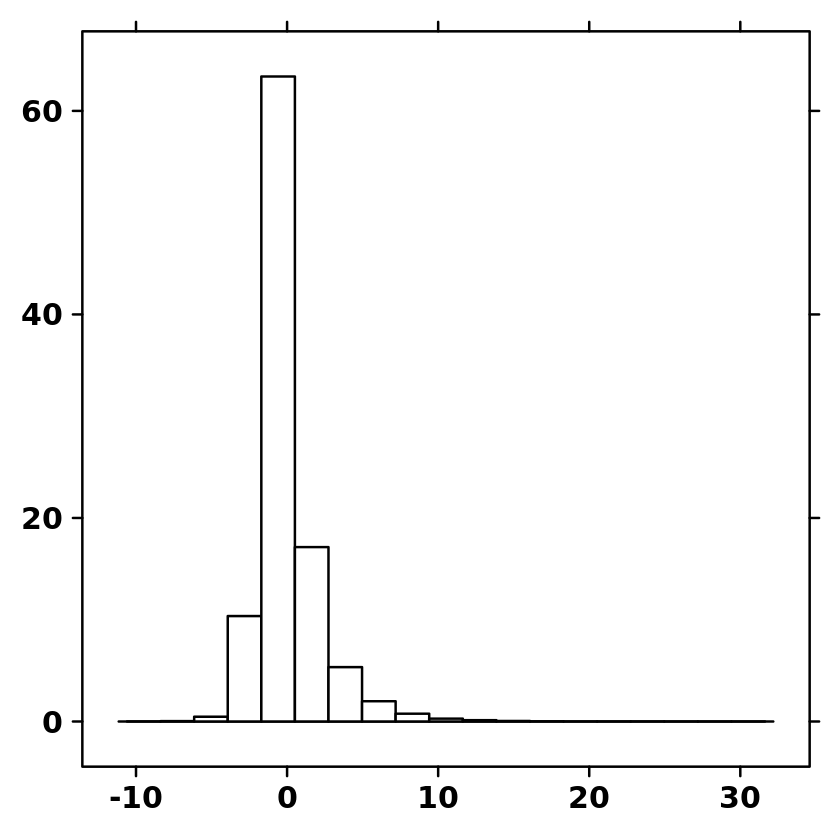

In [40]:
create.histogram(
    covariate.diffs
)

In [41]:
model.df <- cbind(covariates, guide.1.vector, guide.2.vector, guide.3.vector, guide.4.vector, target.gene.counts)
head(model.df)

,cell.barcodes,guide_count,prep_batch,percent.mito,s.score,g2m.score,guide.1.vector,guide.2.vector,guide.3.vector,guide.4.vector,target.gene.counts
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,AAACCTGAGAGGTACC-1_1A_1_SI-GA-E2,67,prep_batch_1,0.058786706,0.110732311,-0.1319208,0,0,0,0,1
2,AAACCTGAGTCAATAG-1_1A_1_SI-GA-E2,26,prep_batch_1,0.036086518,-0.010290919,-0.1535426,0,0,0,0,0
3,AAACCTGCAAACAACA-1_1A_1_SI-GA-E2,61,prep_batch_1,0.069823051,-0.175860130,-0.3084879,0,0,0,0,0
4,AAACCTGCACTTCTGC-1_1A_1_SI-GA-E2,39,prep_batch_1,0.026186508,0.003057281,-0.1574859,0,0,0,0,0
5,AAACCTGCATGTAGTC-1_1A_1_SI-GA-E2,37,prep_batch_1,0.007991318,-0.144480961,-0.2362154,0,0,0,0,5
6,AAACCTGGTAGCGCAA-1_1A_1_SI-GA-E2,57,prep_batch_1,0.022356681,0.026418076,-0.1462899,0,0,0,0,0


In [42]:
model <- glm.nb(
    formula = target.gene.counts ~ guide.1.vector + guide.2.vector + guide.3.vector + guide.4.vector + prep_batch + guide_count + percent.mito + s.score + g2m.score + offset(scaling.factors),
    data = model.df
)

In [43]:
summary(model)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.844559341,0.0096183105,-87.807452,0.000000e+00
guide.1.vector,-0.702816810,0.0518779396,-13.547508,8.196565e-42
guide.2.vector,-0.688823953,0.0680846580,-10.117168,4.636346e-24
guide.3.vector,-0.673156210,0.0689704319,-9.760070,1.670407e-22
guide.4.vector,-0.759826019,0.0634945249,-11.966796,5.303749e-33
prep_batchprep_batch_2,0.060634261,0.0057763270,10.497027,8.914346e-26
guide_count,0.007664017,0.0001891726,40.513359,0.000000e+00
percent.mito,23.083925618,0.1632921356,141.365814,0.000000e+00
s.score,-0.230710410,0.0277188346,-8.323236,8.559357e-17
g2m.score,1.338140338,0.0143432936,93.293798,0.000000e+00


In [59]:
min(summary(model)$coefficients[, 'Estimate'])

[1] -0.8445593